In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.preprocessing import StandardScaler
import warnings
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

In [2]:
df = pd.read_csv('diabetes.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [3]:
df.shape

(768, 9)

In [4]:
df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)
df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   763 non-null    float64
 2   BloodPressure             733 non-null    float64
 3   SkinThickness             541 non-null    float64
 4   Insulin                   394 non-null    float64
 5   BMI                       757 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


In [6]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0
764,2,122.0,70.0,27.0,NaN,36.8,0.340,27,0
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0
766,1,126.0,60.0,NaN,NaN,30.1,0.349,47,1


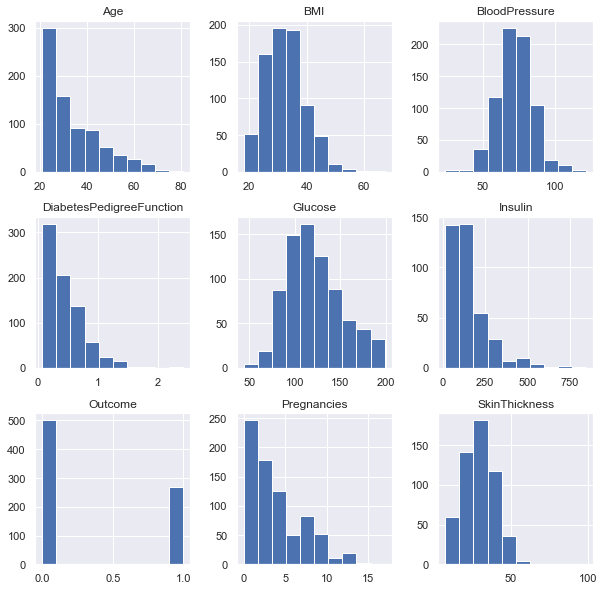

In [7]:
p = df.hist(figsize = (10,10))

In [8]:
df['Glucose'].fillna(df['Glucose'].mean(), inplace = True)
df['BloodPressure'].fillna(df['BloodPressure'].mean(), inplace = True)
df['SkinThickness'].fillna(df['SkinThickness'].median(), inplace = True)
df['Insulin'].fillna(df['Insulin'].median(), inplace = True)
df['BMI'].fillna(df['BMI'].median(), inplace = True)

In [9]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


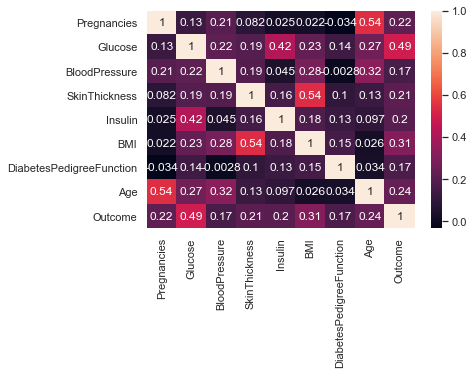

In [10]:
sns.heatmap(df.corr(),annot=True)

In [11]:
scaler = StandardScaler()


df[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI', 'DiabetesPedigreeFunction', 'Age']]=scaler.fit_transform(df[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI', 'DiabetesPedigreeFunction', 'Age']])

df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.639947,0.865108,-0.033518,0.670643,-0.181541,0.166619,0.468492,1.425995,1
1,-0.844885,-1.206162,-0.529859,-0.012301,-0.181541,-0.852200,-0.365061,-0.190672,0
2,1.233880,2.015813,-0.695306,-0.012301,-0.181541,-1.332500,0.604397,-0.105584,1
3,-0.844885,-1.074652,-0.529859,-0.695245,-0.540642,-0.633881,-0.920763,-1.041549,0
4,-1.141852,0.503458,-2.680669,0.670643,0.316566,1.549303,5.484909,-0.020496,1
...,...,...,...,...,...,...,...,...,...
763,1.827813,-0.680125,0.297376,2.150354,0.455573,0.064737,-0.908682,2.532136,0
764,-0.547919,0.010298,-0.198965,-0.239949,-0.181541,0.632365,-0.398282,-0.531023,0
765,0.342981,-0.022579,-0.033518,-0.695245,-0.332132,-0.910418,-0.685193,-0.275760,0
766,-0.844885,0.141808,-1.026200,-0.012301,-0.181541,-0.342790,-0.371101,1.170732,1


In [12]:
df.shape

(768, 9)

In [ ]:
###### KNN ######

In [61]:
X = df.drop('Outcome', axis = 1)
y = df['Outcome']
X_train, X_test, y_train, y_test = train_test_split(  X, y, test_size=0.2, random_state=100)

In [62]:
from sklearn.neighbors import KNeighborsClassifier
import sklearn


test_scores = []
train_scores = []

for i in range(1,15):

    knn = KNeighborsClassifier(i)
    knn.fit(X_train,y_train)
    
    y_pred = knn.predict(X_test)
    
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(sklearn.metrics.roc_auc_score(y_test,y_pred))

In [63]:
max_train_score = max(train_scores)
for i, v in enumerate(train_scores):
    print(i+1, v)
train_scores_ind = [i for i, v in enumerate(train_scores) if v == max_train_score]
print('Max train score {} % and k = {}'.format(max_train_score*100,list(map(lambda x: x+1, train_scores_ind))))

1 1.0
2 0.8697068403908795
3 0.8583061889250815
4 0.8322475570032574
5 0.8436482084690554
6 0.8175895765472313
7 0.8224755700325733
8 0.8143322475570033
9 0.8241042345276873
10 0.8192182410423453
11 0.8224755700325733
12 0.8208469055374593
13 0.8241042345276873
14 0.8127035830618893
Max train score 100.0 % and k = [1]


In [64]:
max_test_score = max(test_scores)
for i, v in enumerate(test_scores):
    print(i+1, v)
test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]
print('Max test score {} % and k = {}'.format(max_test_score*100,list(map(lambda x: x+1, test_scores_ind))))

1 0.573883803474687
2 0.5762189426489818
3 0.6453390622081076
4 0.6462731178778255
5 0.6359050999439567
6 0.6422566784980385
7 0.6557070801419765
8 0.6328227162338875
9 0.6606575751914815
10 0.6705585652904913
11 0.6656080702409864
12 0.6328227162338875
13 0.6611246030263402
14 0.6566411358116944
Max test score 67.05585652904912 % and k = [10]


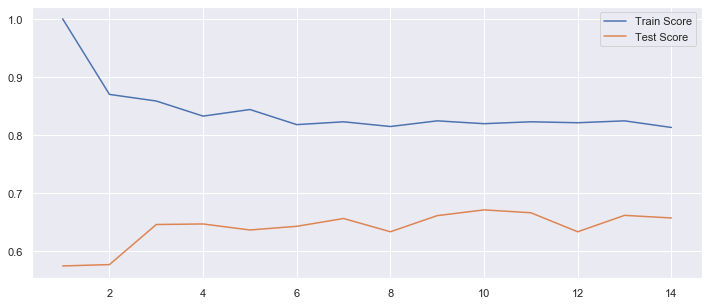

In [65]:
plt.figure(figsize=(12,5))
p = sns.lineplot(range(1,15),train_scores,label='Train Score')
p = sns.lineplot(range(1,15),test_scores,label='Test Score')

In [66]:
# best result at k=5, thus 10 is chosen as 10

knn = KNeighborsClassifier(10)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)

print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.76      0.83      0.80       101
           1       0.61      0.51      0.56        53

    accuracy                           0.72       154
   macro avg       0.69      0.67      0.68       154
weighted avg       0.71      0.72      0.71       154



[[79 16]
 [25 34]]


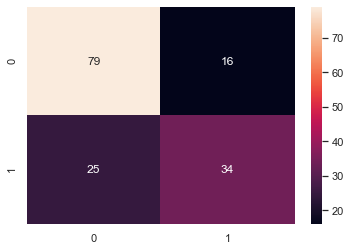

In [37]:
print(metrics.confusion_matrix(y_test,y_pred))
sns.heatmap(metrics.confusion_matrix(y_test,y_pred),annot=True)

In [ ]:
####### DECISON TREE #########

In [41]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.639947,0.865108,-0.033518,0.670643,-0.181541,0.166619,0.468492,1.425995,1
1,-0.844885,-1.206162,-0.529859,-0.012301,-0.181541,-0.852200,-0.365061,-0.190672,0
2,1.233880,2.015813,-0.695306,-0.012301,-0.181541,-1.332500,0.604397,-0.105584,1
3,-0.844885,-1.074652,-0.529859,-0.695245,-0.540642,-0.633881,-0.920763,-1.041549,0
4,-1.141852,0.503458,-2.680669,0.670643,0.316566,1.549303,5.484909,-0.020496,1


In [42]:
x = df.drop('Outcome', axis = 1)
y = df['Outcome']

In [49]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.2, random_state=100)

In [50]:
classifier = DecisionTreeClassifier(criterion='gini')
classifier = classifier.fit(X_train, Y_train)

In [51]:
y_pred = classifier.predict(X_test)
print(y_pred)

[0 0 0 0 0 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 0 0 1 1 0 1 0 0 1 1 0 1 0 0 0 0 1
 0 0 0 1 1 1 0 0 0 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0
 0 1 0 1 1 0 0 0 0 0 0 0 1 0 0 1 1 0 1 0 0 1 0 1 0 1 1 0 1 0 0 0 1 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 1 1 0 1 1 0 0 0
 0 0 0 0 0 0]


In [52]:
print(y_pred[0:10])
print(Y_test[0:10])

[0 0 0 0 0 1 1 1 1 0]
173    0
253    0
207    1
737    0
191    0
754    1
159    1
448    1
359    1
651    0
Name: Outcome, dtype: int64


In [53]:
metrics.confusion_matrix(Y_test, y_pred)
print(metrics.confusion_matrix(Y_test, y_pred))

print(metrics.classification_report(Y_test,y_pred))
print("Accuracy:", metrics.accuracy_score(Y_test,y_pred))

[[82 19]
 [23 30]]
              precision    recall  f1-score   support

           0       0.78      0.81      0.80       101
           1       0.61      0.57      0.59        53

    accuracy                           0.73       154
   macro avg       0.70      0.69      0.69       154
weighted avg       0.72      0.73      0.72       154

Accuracy: 0.7272727272727273


[[67 28]
 [38 21]]


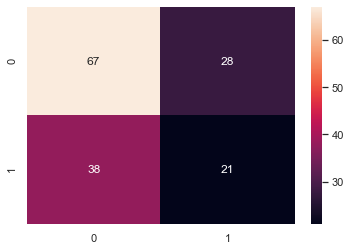

In [54]:
print(metrics.confusion_matrix(y_test,y_pred))
sns.heatmap(metrics.confusion_matrix(y_test,y_pred),annot=True)